from wordcloud import WordCloud
- 이 패키지는 말그대로 워드클라우드를 생성에 필요한 기본 모듈입니다.

import matplotlib.pyplot as plt
- 생성한 워드클라우드 데이터를 시각화하여 그리기 위해 불러옵니다.

from collections import Counter
- 텍스트를 추출하고, 빈도 수를 추출하기 위해 사용합니다. 기본적으로 워드클라우드는 단어의 출현 빈도가 클수록 더 크게 그려집니다.

from konlpy.tag import Okt
- 한국어를 처리하는 대표적인 형태소 분석 패키지입니다. Okt, Kkma 등 여러가지 패키지들이 존재하는데 형태소 분석기마다 명사, 명사 등의 형태소를 조금씩 다르게 처리하므로 다양하게 사용해본 후, 가지고 있는 문서 특성에 적합한 형태소 분석기를 사용하는 것이 좋습니다.

from PIL import Image
- 워드클라우드를 원하는 형태로 그리기 위해 그림을 불러오는 패키지입니다.

import numpy as np
- 불러온 그림을 배열로 나타내어 쉽게 처리할 수 있도록 도와주는 패키지입니다.



** cannot open resource 해결방법
 https://bit.ly/3J7Oz4D

 
** 한글폰트 사용하기 
https://www.youtube.com/watch?v=XfLZH7-1pcM


In [ ]:
# ======= 형태소 분석을 위해 한글 분석 모듈 konlpy를 설치한다. =============
!python -m pip install konlpy
import konlpy 
print('KoNLPy version...:', konlpy.__version__)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 19.4 MB 1.2 MB/s 
     |████████████████████████████████| 453 kB 62.3 MB/s 
KoNLPy version...: 0.6.0


In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter
from konlpy.tag import Okt
from PIL import Image
import numpy as np

In [ ]:

# --- 한글 워드 클라우드를 그리기 위해 한글 폰트를 설치한다.
# 한글 폰트를 설치한다.
!apt -qq -y install fonts-nanum
 
# 나눔바른고딕(NanumBarunGothic)을 사용하기 위해 경로를 포함시킨다.
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf' 

The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 49 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Selecting previously unselected package fonts-nanum.
(Reading database ... 155673 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20170925-1_all.deb ...
Unpacking fonts-nanum (20170925-1) ...
Setting up fonts-nanum (20170925-1) ...
Processing triggers for fontconfig (2.12.6-0ubuntu2) ...


In [ ]:
with open('힙으뜸220724.txt', 'r', encoding='utf-8') as f:  #파일이름 넣기                   
    text = f.read()

okt = Okt()
nouns = okt.nouns(text) # 명사만 추출

words = [n for n in nouns if len(n) > 1] # 단어의 길이가 1개인 것은 제외

c = Counter(words) # 위에서 얻은 words를 처리하여 단어별 빈도수 형태의 딕셔너리 데이터를 구함

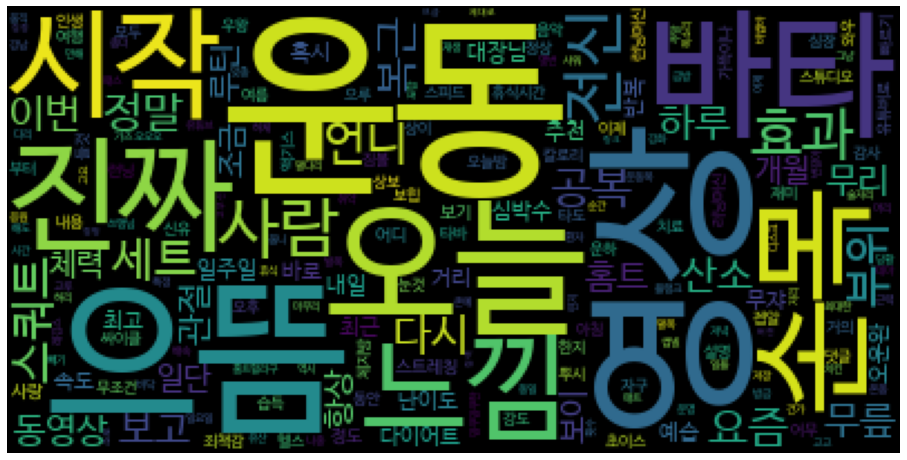

In [ ]:
from wordcloud import WordCloud

wordcloud = WordCloud(
  font_path=fontpath,
  relative_scaling=0.2,
  background_color='black',
).generate_from_frequencies(dict(c))

from matplotlib import pyplot

pyplot.figure(figsize=(16, 10))  # width, height in inches
pyplot.imshow(wordcloud)
pyplot.axis('off')
pyplot.show()

In [ ]:
wordcloud.to_file('힙으뜸220724_test.png')